# The Dataset

The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences.This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior.

With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

# Questions

1. What are the most item purchases at different seosons and why? As business that information is critical to keep the inventory updated on my clients preferences regardless of age, gender etc.

2. I want to find out what influences the frequency of purchase, as a business it is important to have returning customers to garantee the longevity of my business, also are there factors such as free shipping or discount that influence the frequency of purchase

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns

df=pd.read_csv('ShoppingBehavior.csv')

pd.set_option('display.max_columns',85)

In [354]:
palette = ["#CA3542","#27647B","#849FAD","#AEC0C9","#57575F"]

sns.set_style("white")
sns.set_palette(palette)

In [355]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [357]:
# Creating a new column called age group to find out if we can classify variables based on age
def age_group(df):

    df.loc[(df['Age']<=39),'Age Group']='Young Adult'
    df.loc[(df['Age']>39)&(df['Age']<59),'Age Group']='Middle Aged'
    df.loc[(df['Age']>=59),'Age Group']='Old Adults'

    return df
    
df=age_group(df)

In [358]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [359]:
df.groupby(["Location"])["Shipping Type"].value_counts(normalize=True).reset_index().head(20)

,Location,Shipping Type,proportion
0,Alabama,Express,0.224719
1,Alabama,Store Pickup,0.213483
2,Alabama,Next Day Air,0.191011
3,Alabama,2-Day Shipping,0.179775
4,Alabama,Free Shipping,0.101124
5,Alabama,Standard,0.089888
6,Alaska,Standard,0.236111
7,Alaska,Free Shipping,0.194444
8,Alaska,2-Day Shipping,0.180556
9,Alaska,Express,0.180556


# Subscription

In [360]:
df.groupby(["Item Purchased","Subscription Status"])["Purchase Amount (USD)"].value_counts().reset_index()

,Item Purchased,Subscription Status,Purchase Amount (USD),count
0,Backpack,No,63,5
1,Backpack,No,30,5
2,Backpack,No,22,4
3,Backpack,No,58,4
4,Backpack,No,49,4
...,...,...,...,...
2388,T-shirt,Yes,66,1
2389,T-shirt,Yes,65,1
2390,T-shirt,Yes,63,1
2391,T-shirt,Yes,62,1


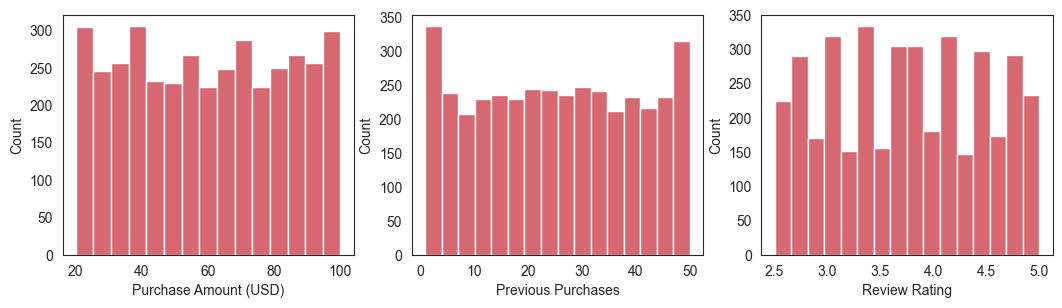

In [361]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3))
a=sns.histplot(data=df,x="Purchase Amount (USD)",ax=axs[0])
a=sns.histplot(data=df,x="Previous Purchases",ax=axs[1])
a=sns.histplot(data=df,x="Review Rating",ax=axs[2])

plt.subplots_adjust(bottom=0.1,top=0.9,hspace=0.4,left=0)

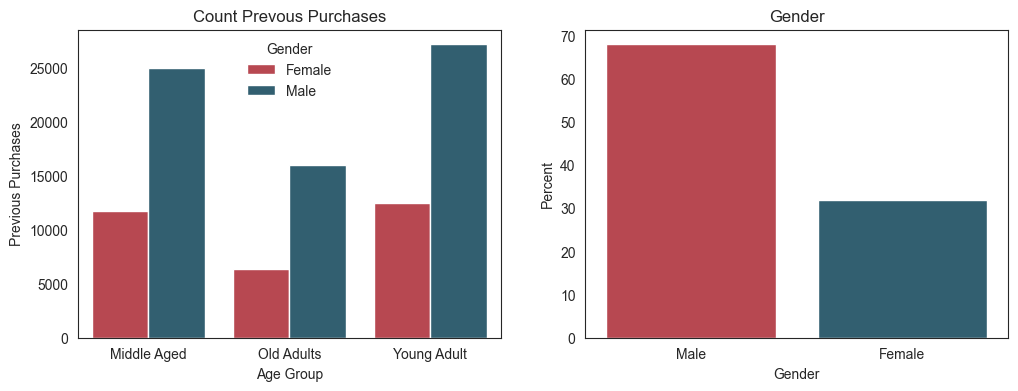

In [362]:

ga=df.groupby(["Gender","Age Group"])[["Purchase Amount (USD)","Previous Purchases"]].sum().reset_index()
#Gender(g)
g=df["Gender"].value_counts(normalize=True).rename("Percent").mul(100).reset_index()
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
a=sns.barplot(data=ga,x="Age Group",y="Previous Purchases",hue="Gender",ax=axs[0]);
b=sns.barplot(data=g,x="Gender",y="Percent",ax=axs[1]);
a.set(title="Count Prevous Purchases");
b.set(title="Gender");
a.legend(title="Gender",frameon=False);

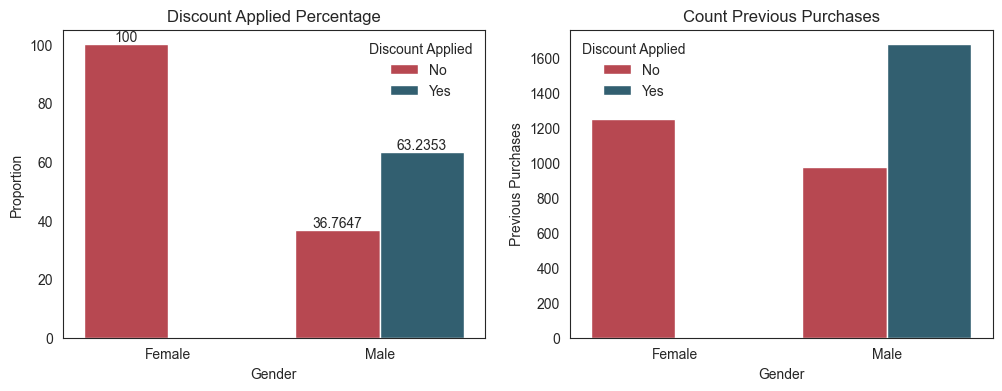

In [363]:

#Gender Discount(gd)
gd=df.groupby(["Gender"])["Discount Applied"].value_counts(normalize=True).mul(100).rename("Proportion").reset_index()
#Discount Previous Purchases(dp)
dp=df.groupby(["Gender","Discount Applied"])["Previous Purchases"].count().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
a=sns.barplot(data=dp,x="Gender",y="Previous Purchases",hue="Discount Applied",ax=axs[1]);
b=sns.barplot(data=gd,x="Gender",y="Proportion",hue="Discount Applied",ax=axs[0]);
b.legend(title="Discount Applied",frameon=False);
a.set(title='Count Previous Purchases');
b.set(title='Discount Applied Percentage');
a.legend(title="Discount Applied",loc='upper left',frameon=False);
b.bar_label(b.containers[0], fontsize=10);
b.bar_label(b.containers[1], fontsize=10);

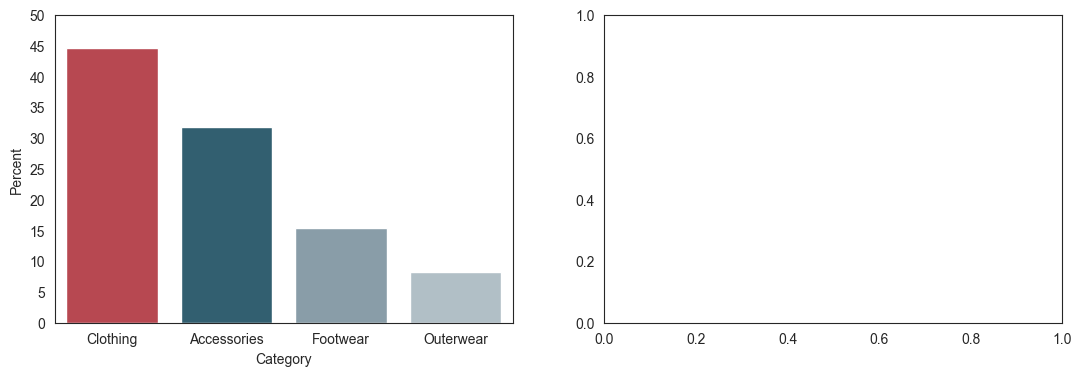

In [501]:

cc=df["Category"].value_counts(normalize=True).mul(100).rename("Percent").reset_index()
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
a=sns.barplot(data=cc,x="Category",y="Percent",ax=axs[0]);
a.yaxis.set_major_locator(ticker.MultipleLocator(5))
a.set(ylim=(0,50));
#for i in a.containers:
#    a.bar_label(i,)

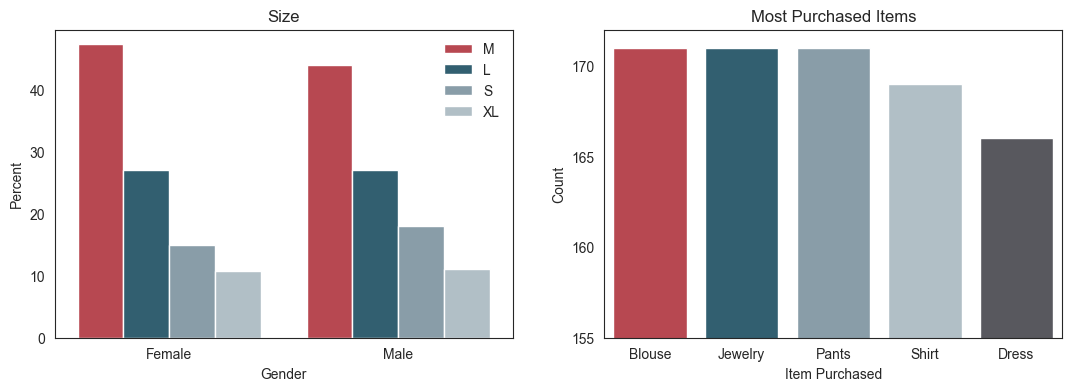

In [458]:
#Gender Size(gs)
gs=df.groupby(["Gender"])["Size"].value_counts(normalize=True).mul(100).rename("Percent").reset_index()
ip=df["Item Purchased"].value_counts().rename("Count").reset_index().head(5)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
a=sns.barplot(data=gs,x="Gender",y="Percent",hue="Size",ax=axs[0]);
b=sns.barplot(data=ip,x="Item Purchased",y="Count",ax=axs[1]);
a.set(title="Size");
b.set(title="Most Purchased Items");
a.legend(frameon=False);
b.yaxis.set_major_locator(ticker.MultipleLocator(5))
b.set(ylim=(155,172));

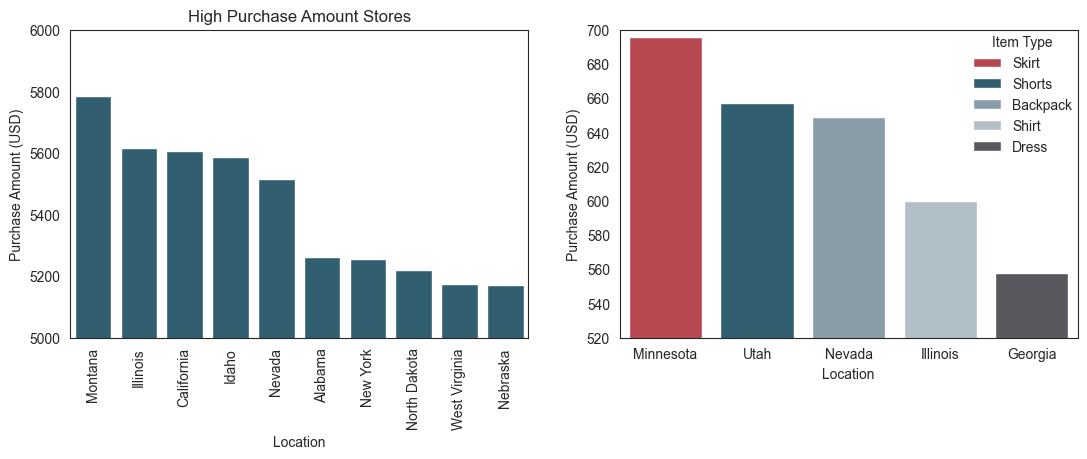

In [419]:

il=df.groupby(["Item Purchased","Location"])["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index().head(5)
lp=df.groupby('Location')["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index().head(10)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

a=sns.barplot(data=lp,x="Location",y="Purchase Amount (USD)",color="#27647B",ax=axs[0]);
a.yaxis.set_major_locator(ticker.MultipleLocator(200))
a.set(ylim=(5000,6000));
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set(title="High Purchase Amount Stores");

b=sns.barplot(data=il,x="Location",y="Purchase Amount (USD)", dodge=False,hue="Item Purchased",ax=axs[1]);
b.legend( loc='upper right',title="Item Type", borderaxespad=0,frameon=False);
b.yaxis.set_major_locator(ticker.MultipleLocator(20))
b.set(ylim=(520,700));


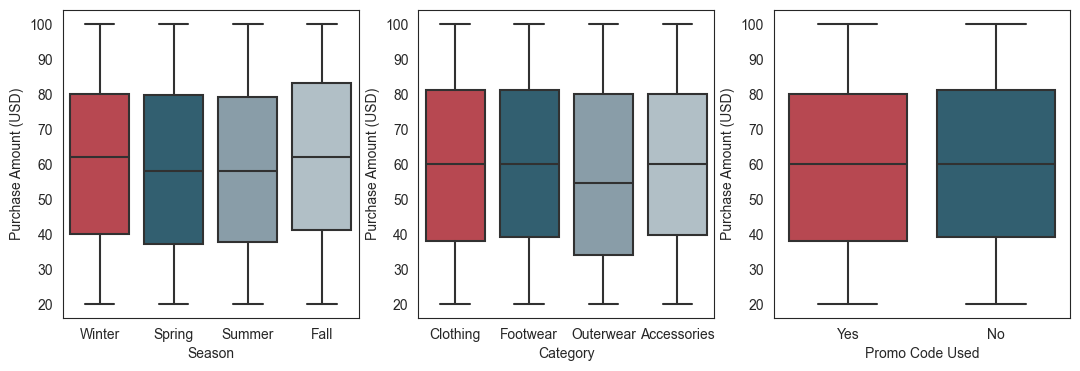

In [421]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Season',ax=axs[0])
a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Category',ax=axs[1])
a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Promo Code Used',ax=axs[2])

In [453]:
df.head(4)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult


In [448]:
items=["Blouse","Jewelry","Pants","Shirt","Dress"]
dfi=df[df["Item Purchased"].isin(items)]

In [449]:
area=["Minnesota","Utah","Neveda"]
dfa=dfi[dfi["Location"].isin(area)]

In [430]:
df.groupby(["Discount Applied","Item Purchased","Location"])["Purchase Amount (USD)"].min().reset_index()

,Discount Applied,Item Purchased,Location,Purchase Amount (USD)
0,No,Backpack,Alabama,74
1,No,Backpack,Alaska,24
2,No,Backpack,Arizona,22
3,No,Backpack,Arkansas,78
4,No,Backpack,California,22
...,...,...,...,...
1970,Yes,T-shirt,Virginia,99
1971,Yes,T-shirt,Washington,31
1972,Yes,T-shirt,West Virginia,45
1973,Yes,T-shirt,Wisconsin,32


In [367]:
df.groupby(["Subscription Status","Gender"])[["Discount Applied"]].value_counts(normalize=True).reset_index()

,Subscription Status,Gender,Discount Applied,proportion
0,No,Female,No,1.000000
1,No,Male,No,0.609756
2,No,Male,Yes,0.390244
3,Yes,Male,Yes,1.000000


In [368]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged


In [369]:
df.groupby(["Gender"])[["Subscription Status","Discount Applied"]].value_counts(normalize=True).mul(100).reset_index()

,Gender,Subscription Status,Discount Applied,proportion
0,Female,No,No,100.000000
1,Male,Yes,Yes,39.705882
2,Male,No,No,36.764706
3,Male,No,Yes,23.529412


In [475]:
ca=df.groupby("Category")["Frequency of Purchases"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index().head(30)

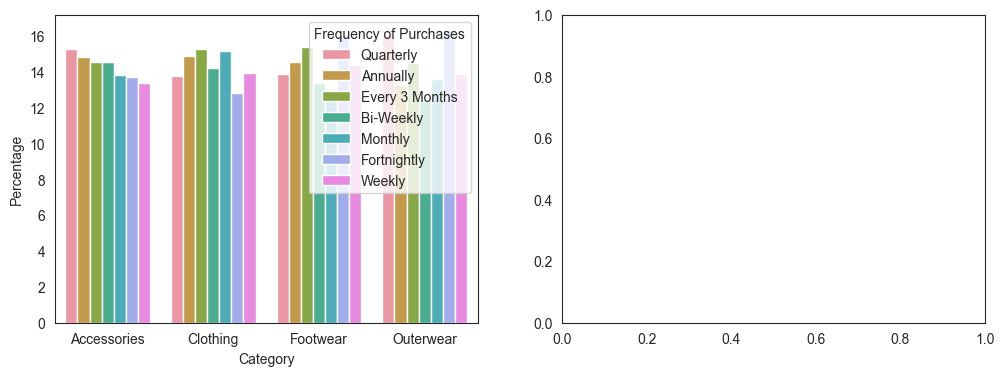

In [478]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
a=sns.barplot(data=ca,x="Category",y="Percentage",hue="Frequency of Purchases",ax=axs[0]);

In [371]:
df.groupby(["Subscription Status","Shipping Type"])["Purchase Amount (USD)"].sum().reset_index()

,Subscription Status,Shipping Type,Purchase Amount (USD)
0,No,2-Day Shipping,29175
1,No,Express,27622
2,No,Free Shipping,30147
3,No,Next Day Air,27870
4,No,Standard,27656
5,No,Store Pickup,27966
6,Yes,2-Day Shipping,8905
7,Yes,Express,11445
8,Yes,Free Shipping,10630
9,Yes,Next Day Air,10123


In [372]:
df.groupby(["Discount Applied"])["Shipping Type"].value_counts(normalize=True).mul(100).reset_index()

,Discount Applied,Shipping Type,proportion
0,No,Free Shipping,17.858749
1,No,2-Day Shipping,16.734143
2,No,Standard,16.599190
3,No,Express,16.509222
4,No,Store Pickup,16.419253
5,No,Next Day Air,15.879442
6,Yes,Next Day Air,17.590936
7,Yes,Standard,16.994633
8,Yes,Store Pickup,16.994633
9,Yes,Express,16.636852


In [373]:
df.groupby(["Discount Applied"])["Payment Method"].value_counts().reset_index()

,Discount Applied,Payment Method,count
0,No,PayPal,397
1,No,Credit Card,391
2,No,Cash,387
3,No,Bank Transfer,353
4,No,Venmo,348
5,No,Debit Card,347
6,Yes,Debit Card,289
7,Yes,Venmo,286
8,Yes,Cash,283
9,Yes,Credit Card,280


In [374]:
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,Middle Aged
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,Old Adults
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,Young Adult
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,Young Adult
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,Middle Aged


In [375]:
df.groupby(["Subscription Status"])[["Previous Purchases","Purchase Amount (USD)"]].sum().reset_index()

,Subscription Status,Previous Purchases,Purchase Amount (USD)
0,No,71404,170436
1,Yes,27467,62645


In [376]:
df.groupby(["Gender","Subscription Status","Discount Applied"])[["Purchase Amount (USD)","Previous Purchases"]].sum().reset_index()

,Gender,Subscription Status,Discount Applied,Purchase Amount (USD),Previous Purchases
0,Female,No,No,75191,30696
1,Male,No,No,58479,25004
2,Male,No,Yes,36766,15704
3,Male,Yes,Yes,62645,27467


In [380]:
il=df.groupby(["Item Purchased","Location"])["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index().head(1)

# Purchase

In [381]:
df.groupby(["Location"])["Frequency of Purchases"].value_counts().sort_values(ascending=False).reset_index().head(20)

,Location,Frequency of Purchases,count
0,Missouri,Quarterly,24
1,Illinois,Bi-Weekly,20
2,Louisiana,Weekly,20
3,Idaho,Every 3 Months,19
4,Alabama,Every 3 Months,18
5,California,Monthly,18
6,Delaware,Quarterly,18
7,Georgia,Weekly,18
8,Minnesota,Monthly,18
9,Nebraska,Fortnightly,18


In [382]:
df.groupby(["Location"])["Frequency of Purchases"].count().sort_values(ascending=False)

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nevada            87
Nebraska          87
New York          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
New Mexico        81
West Virginia     81
Missouri          81
Mississippi       80
Georgia           79
Arkansas          79
Indiana           79
Kentucky          79
North Carolina    78
Connecticut       78
Ohio              77
Tennessee         77
Texas             77
Virginia          77
Maine             77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Massachusetts     72
Alaska            72
New Hampshire     71
Utah              71
Wyoming           71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

In [383]:
df.groupby(['Category','Season'])["Previous Purchases"].sum()

Category     Season
Accessories  Fall       7987
             Spring     7809
             Summer     8363
             Winter     7741
Clothing     Fall      10869
             Spring    11241
             Summer     9980
             Winter    11681
Footwear     Fall       3344
             Spring     3939
             Summer     4098
             Winter     3733
Outerwear    Fall       2146
             Spring     2102
             Summer     1824
             Winter     2014
Name: Previous Purchases, dtype: int64

# Item Types

In [219]:
df.groupby(['Category','Season'])["Item Purchased"].value_counts().sort_values(ascending=False).reset_index()

,Category,Season,Item Purchased,count
0,Outerwear,Fall,Jacket,54
1,Clothing,Spring,Sweater,52
2,Accessories,Winter,Sunglasses,52
3,Clothing,Winter,Pants,51
4,Accessories,Fall,Hat,50
...,...,...,...,...
95,Clothing,Summer,Skirt,28
96,Clothing,Summer,Sweater,28
97,Accessories,Spring,Hat,27
98,Footwear,Fall,Shoes,26


In [220]:
#dfa['Marital_Status'].value_counts(normalize=True).mul(100).reset_index()

In [221]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Rating

In [222]:
dr=df[(df["Review Rating"]<=3)]

In [223]:
dr

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,Middle Aged
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,Young Adult
15,16,64,Male,Skirt,Clothing,81,Rhode Island,M,Teal,Winter,2.8,Yes,Store Pickup,Yes,Yes,8,PayPal,Monthly,Old Adults
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash,Every 3 Months,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3882,56,Female,Scarf,Accessories,25,Georgia,L,Silver,Spring,2.8,No,2-Day Shipping,No,No,17,Debit Card,Weekly,Middle Aged
3882,3883,35,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly,Young Adult
3887,3888,40,Female,Shirt,Clothing,34,Kansas,M,Charcoal,Spring,2.7,No,Express,No,No,1,Credit Card,Quarterly,Middle Aged
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually,Young Adult


In [224]:
dr.groupby("Location")["Item Purchased"].value_counts().sort_values(ascending=False).reset_index().head(10)

,Location,Item Purchased,count
0,West Virginia,Sunglasses,5
1,New Hampshire,Blouse,5
2,Oregon,Blouse,4
3,Illinois,Shirt,4
4,Georgia,Scarf,4
5,Idaho,Sweater,4
6,Minnesota,Skirt,4
7,Illinois,Belt,3
8,West Virginia,Handbag,3
9,Hawaii,Jacket,3


In [225]:
dr['Location'].value_counts()

Location
West Virginia     24
Illinois          24
Georgia           24
New Hampshire     23
Connecticut       22
Oklahoma          22
Louisiana         22
Nevada            21
Nebraska          19
Vermont           19
New York          19
Arkansas          19
New Mexico        19
Mississippi       19
Wyoming           18
Virginia          18
Tennessee         18
Montana           18
South Carolina    18
Alabama           17
Colorado          17
Washington        17
North Dakota      17
Michigan          17
South Dakota      17
Idaho             17
Utah              17
Hawaii            17
Kentucky          16
Arizona           16
Maryland          16
Alaska            16
Indiana           16
Florida           16
Delaware          16
Maine             15
California        15
Rhode Island      15
Wisconsin         14
Ohio              14
Oregon            14
Pennsylvania      14
Missouri          14
Minnesota         13
Massachusetts     13
New Jersey        12
North Carolina    12
Iowa

In [226]:
wv=dr[dr["Location"]=="West Virginia"]

In [227]:
df[(df["Previous Purchases"]>=38)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,Old Adults
16,17,25,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,4.1,Yes,Next Day Air,Yes,Yes,44,Debit Card,Bi-Weekly,Young Adult
19,20,66,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly,Old Adults
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash,Every 3 Months,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,3886,49,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly,Middle Aged
3886,3887,37,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly,Young Adult
3889,3890,57,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually,Middle Aged
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months,Old Adults


In [228]:
df.groupby(["Location"])["Purchase Amount (USD)"].sum().sort_values(ascending=False)

Location
Montana           5784
Illinois          5617
California        5605
Idaho             5587
Nevada            5514
Alabama           5261
New York          5257
North Dakota      5220
West Virginia     5174
Nebraska          5172
New Mexico        5014
Minnesota         4977
Pennsylvania      4926
Mississippi       4883
Alaska            4867
Vermont           4860
Louisiana         4848
Virginia          4842
Arkansas          4828
Maryland          4795
Tennessee         4772
Delaware          4758
North Carolina    4742
Texas             4712
Missouri          4691
Indiana           4655
Ohio              4649
Georgia           4645
Washington        4623
Michigan          4533
Utah              4443
South Carolina    4439
Kentucky          4402
Maine             4388
Massachusetts     4384
Oklahoma          4376
Arizona           4326
Wyoming           4309
Oregon            4243
South Dakota      4236
Connecticut       4226
Colorado          4222
New Hampshire     4219
Io

In [229]:
df.groupby('Gender')["Item Purchased"].value_counts().reset_index()

,Gender,Item Purchased,count
0,Female,Blouse,66
1,Female,Sandals,59
2,Female,Shirt,59
3,Female,Handbag,58
4,Female,Socks,58
5,Female,Sunglasses,56
6,Female,Belt,55
7,Female,Jacket,54
8,Female,Dress,52
9,Female,Jewelry,52


In [230]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged


In [231]:
dr.groupby(["Purchase Amount (USD)","Item Purchased"])[["Discount Applied"]].value_counts().reset_index().tail(30)

,Purchase Amount (USD),Item Purchased,Discount Applied,count
723,98,Jacket,No,1
724,98,Jeans,No,1
725,98,Sandals,No,1
726,98,Shirt,No,1
727,98,Shorts,Yes,1
728,98,Shorts,No,1
729,98,Skirt,No,1
730,98,Sneakers,No,1
731,98,Socks,No,1
732,98,Sunglasses,Yes,1
